EDA of Facebook Data Set

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Set path of the file
file_path="C:/2019-2/My_Data/UPx_Academy/Data_Set/"

In [3]:
# Read Facebook DataSet. Separator is used as file is tab separated
facebook_data=pd.read_csv(file_path+"pseudo_facebook.tsv",sep='\t')
# Get No of Rows and columns
facebook_data.shape

(99003, 15)

In [4]:
# check Sample Data
facebook_data.head(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
5,1524765,14,1,1999,12,male,15.0,0,0,0,0,0,0,0,0
6,1136133,13,14,2000,1,male,12.0,0,0,0,0,0,0,0,0
7,1680361,13,4,2000,1,female,0.0,0,0,0,0,0,0,0,0
8,1365174,13,1,2000,1,male,81.0,0,0,0,0,0,0,0,0
9,1712567,13,2,2000,2,male,171.0,0,0,0,0,0,0,0,0


In [5]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


<b><i>Observation
+ Total Count of Records - 99003
+ Gender column values do not match with Total no of Records
+ Tenure column values do not match with Total no of Records</i></b>

In [6]:
facebook_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [7]:
# As we have observed Gender do not match with total count of records. 
#Let check unique values in Gender column
print(facebook_data.gender.unique())
# So, gender has got some missing values. 
#Lets count total no of records with each type of gender
facebook_data.gender.value_counts(dropna=False)
# we have got 175 missing values with respect to Gender Column
# as per below count, male users are more on Facebook in comparison to Female

['male' 'female' nan]


male      58574
female    40254
NaN         175
Name: gender, dtype: int64

In [8]:
# Now we have to fill missing values in gender 
#and best way is to use Mode
facebook_data['gender'].mode()[0]
facebook_data['gender'].fillna(facebook_data['gender'].mode()[0],inplace=True)
#Again Check Gender Count whether are there any missing values now
facebook_data.gender.value_counts(dropna=False)

male      58749
female    40254
Name: gender, dtype: int64

In [9]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   99003 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


In [10]:
# Get Count of Missing Values 
facebook_data['tenure'].isnull().sum(axis=0)

2

In [11]:
# As rows count less , we can simply drop these rows
facebook_data.dropna(subset=['tenure'],inplace=True)
facebook_data['tenure'].isnull().sum(axis=0)

0

In [12]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99001 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99001 non-null int64
age                      99001 non-null int64
dob_day                  99001 non-null int64
dob_year                 99001 non-null int64
dob_month                99001 non-null int64
gender                   99001 non-null object
tenure                   99001 non-null float64
friend_count             99001 non-null int64
friendships_initiated    99001 non-null int64
likes                    99001 non-null int64
likes_received           99001 non-null int64
mobile_likes             99001 non-null int64
mobile_likes_received    99001 non-null int64
www_likes                99001 non-null int64
www_likes_received       99001 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 12.1+ MB


In [13]:
# Set Index as User ID
facebook_data.set_index('userid',inplace=True)
facebook_data.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [14]:
# Which age group uses facebook more
# We can analyze it graphically as well as using code
# Lets first analyze it using code

# for Age bucket, check Max Age
facebook_data.describe()
# As per below Data, max Age is 113

,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000,99001.000000
mean,37.279048,14.530550,1975.720952,6.283361,537.887375,196.352885,107.453702,156.080646,142.691448,106.118272,84.121948,49.962314,58.569459
std,22.588436,9.015595,22.588436,3.529621,457.649874,387.307808,188.788658,572.286274,1387.933546,445.257265,839.897864,285.562930,601.422396
min,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [15]:
# Create Bucket to get Age Groups
labels=['11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','101-110','111-120']
facebook_data['age_group']=pd.cut(facebook_data.age,range(10,121,10),right=True,labels=labels)
facebook_data['age_group']

userid
2094382      11-20
1192601      11-20
2083884      11-20
1203168      11-20
1733186      11-20
1524765      11-20
1136133      11-20
1680361      11-20
1365174      11-20
1712567      11-20
1612453      11-20
2104073      11-20
1918584      11-20
1704433      11-20
1932519      11-20
1751722      11-20
1470850      11-20
1001768      11-20
1537661      11-20
1020296      11-20
1472643      11-20
2041297      11-20
1514978      11-20
1708962      11-20
1098955      11-20
1001243      11-20
2113084      11-20
2163454      11-20
1670750      11-20
1041376      11-20
            ...   
1836366      21-30
1686646      41-50
1749991    101-110
1963699      11-20
1390362      11-20
1638976      11-20
1991657      11-20
1184126      11-20
1277820      11-20
1364616      11-20
1757787      11-20
1674381      11-20
1299870      11-20
1043082      11-20
1364887      11-20
1729341      21-30
1008872      21-30
1902600      51-60
1099760      11-20
1422393      11-20
1654565      11-20
20630

In [16]:
facebook_data.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
userid,,,,,,,,,,,,,,,
2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,11-20
1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,11-20
2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,11-20
1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,11-20
1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,11-20


In [17]:
# Count of Users age group wise
facebook_data.groupby('age_group').size().sort_values(ascending=False)
# As per below data, age Group - 21-30 has highest number of users

age_group
21-30      28646
11-20      24752
31-40      12491
51-60       9319
41-50       8968
61-70       6855
101-110     3448
71-80       2249
91-100      1219
81-90        816
111-120      238
dtype: int64

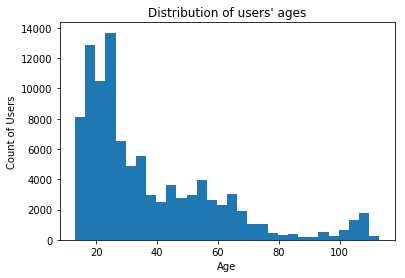

In [18]:
# Now lets find it using a graph

# Let us plot Users Age and Count
facebook_data.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel("Count of Users")
plt.xlabel("Age");
# Graph also display same result - young users are using Facebook More.

In [19]:
# Get Max of users as per Tenure
# to get Count of Tenure - we would first divide tenure into year groups
# Max value of Tenure is 3139 as per data from describe method
tlabels=['0-1 year','1-2 years','2-3 years','3-4 years','4-5 years','5-6 years','6-7 years','7-8 years','8-9 years']
facebook_data['year_group']=pd.cut(facebook_data.tenure,bins=np.arange(0,3300,365),labels=tlabels,right=True)

In [20]:
facebook_data.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
userid,,,,,,,,,,,,,,,,
2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0,11-20,0-1 year
1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0,11-20,0-1 year
2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0,11-20,0-1 year
1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0,11-20,0-1 year
1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0,11-20,0-1 year


In [21]:
facebook_data.year_group.value_counts()
# As per data, highest tenure of users - 0-1 year

0-1 year     43588
1-2 years    33366
2-3 years     9860
3-4 years     5448
4-5 years     4557
5-6 years     1507
6-7 years      581
7-8 years       15
8-9 years        9
Name: year_group, dtype: int64

In [22]:
facebook_data.year_group.fillna(value='0-1 year',inplace=True)

In [23]:
facebook_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99001 entries, 2094382 to 1397896
Data columns (total 16 columns):
age                      99001 non-null int64
dob_day                  99001 non-null int64
dob_year                 99001 non-null int64
dob_month                99001 non-null int64
gender                   99001 non-null object
tenure                   99001 non-null float64
friend_count             99001 non-null int64
friendships_initiated    99001 non-null int64
likes                    99001 non-null int64
likes_received           99001 non-null int64
mobile_likes             99001 non-null int64
mobile_likes_received    99001 non-null int64
www_likes                99001 non-null int64
www_likes_received       99001 non-null int64
age_group                99001 non-null category
year_group               99001 non-null category
dtypes: category(2), float64(1), int64(12), object(1)
memory usage: 14.0+ MB


In [24]:
facebook_data.reset_index(inplace=True)

Text(0,0.5,'No of Users')

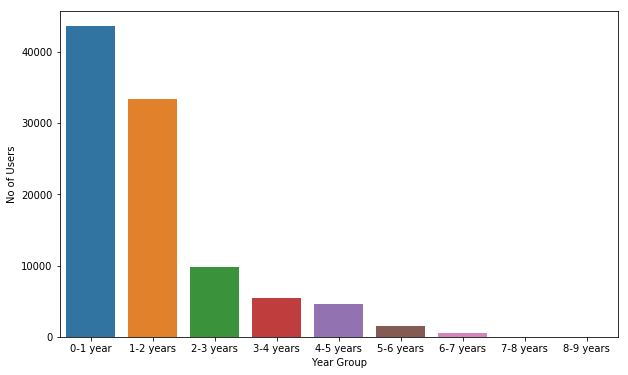

In [44]:
#Graphical Representation of Data
plt.figure(figsize=(10,6))
facebook_col1=facebook_data.groupby('year_group',as_index=False).agg({"userid":"count"})
sns.barplot(x=facebook_col1["year_group"],y=facebook_col1["userid"])
plt.xlabel("Year Group")
plt.ylabel("No of Users")
# as per below graph , there are max no of users in 0-1 Year Tenure

In [26]:
# Who has more friend - Male or Female
facebook_data.groupby('gender').friend_count.sum()
# as per below Data - Female has more no of friends in comparison to Male

gender
female    9740073
male      9699059
Name: friend_count, dtype: int64

Text(0,0.5,'No of Friend Count')

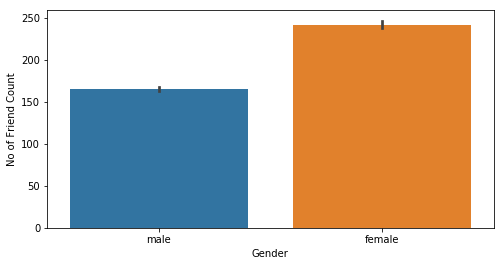

In [56]:
# Represent this data graphically
plt.figure(figsize=(8,4))
sns.barplot(x=facebook_data["gender"],y=facebook_data["friend_count"])
plt.xlabel("Gender")
plt.ylabel("No of Friend Count")
# as per below graph , female has max no of friends

In [27]:
# Lets compare friends count based on Age group and Gender
facebook_data.groupby(['gender','age_group']).friend_count.sum()

gender  age_group
female  11-20        4553627
        21-30        2032981
        31-40         595631
        41-50         486959
        51-60         579069
        61-70         456168
        71-80         145920
        81-90          93121
        91-100        203704
        101-110       560917
        111-120        31976
male    11-20        3410901
        21-30        2804432
        31-40         730729
        41-50         454572
        51-60         433143
        61-70         462538
        71-80         136660
        81-90         135552
        91-100        256932
        101-110       824920
        111-120        48680
Name: friend_count, dtype: int64

In [28]:
# Which age group has more friend count irrespective of Gender
facebook_data.groupby(['age_group']).friend_count.sum().sort_values(ascending=False)
# age group 11-20 has more no of friends count

age_group
11-20      7964528
21-30      4837413
101-110    1385837
31-40      1326360
51-60      1012212
41-50       941531
61-70       918706
91-100      460636
71-80       282580
81-90       228673
111-120      80656
Name: friend_count, dtype: int64

Text(0,0.5,'Friend Count')

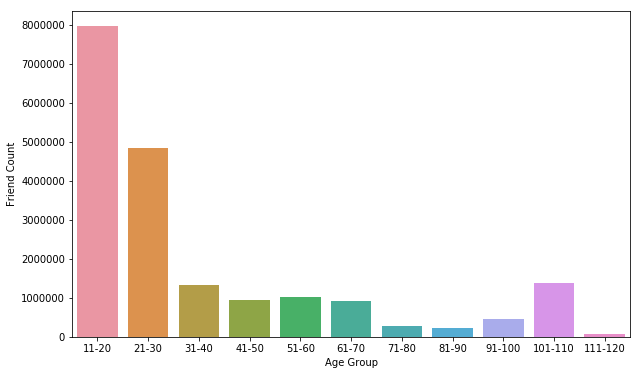

In [61]:
# Lets Represent this data graphically
plt.figure(figsize=(10,6))
facebook_col1=facebook_data.groupby('age_group',as_index=False).agg({"friend_count":"sum"})
#Graphical Representation of Data
plt.figure(figsize=(10,6))
sns.barplot(x=facebook_col1["age_group"],y=facebook_col1["friend_count"])
plt.xlabel("Age Group")
plt.ylabel("Friend Count")

In [30]:
# Lets analyze mobile like & www likes
facebook_data.pivot_table(values=['mobile_likes_received','mobile_likes','www_likes_received',
                                  'www_likes'],index="age_group",columns="gender")

mobile_likes             mobile_likes_received             \
gender          female        male                female       male   
age_group                                                             
11-20       248.751005   70.213104            288.892095  55.163865   
21-30       165.645013   58.041295            142.788701  35.924310   
31-40       174.898677   46.419198            106.549275  27.672434   
41-50       176.355380   55.958110             97.832104  32.929124   
51-60       133.077017   56.566849             72.727291  29.932924   
61-70       111.957092   55.673342             60.727248  35.504380   
71-80        78.029292   29.283333             32.637103  31.496078   
81-90       109.518229   59.148148             74.966146  53.337963   
91-100      119.665996  111.641274             84.623742  75.623269   
101-110     103.198937   85.668231            102.297646  74.315814   
111-120      97.717949   48.694215             70.205128  39.363636   

            www_likes            www_likes_received             
gender         female       male             female       male  
age_group                                                       
11-20      130.071009  32.516180         197.664228  37.177952  
21-30       54.734040  15.015658          89.672343  21.576539  
31-40       50.029437  10.934897          68.240614  16.462514  
41-50       76.554821  17.002184          80.625032  21.411952  
51-60      105.640317  31.676671          72.171510  24.439518  
61-70      106.303088  46.893930          64.030883  30.311327  
71-80       84.175753  45.833333          34.965826  47.999020  
81-90       49.481771  48.634259          39.653646  38.118056  
91-100      61.603622  54.738227          53.507042  48.775623  
101-110     78.571754  44.502112          64.432043  41.175035  
111-120     67.606838  35.264463          56.555556  29.446281

In [31]:
# Lets analyze mobile like & www likes with respect to Gender
facebook_data.pivot_table(values=['mobile_likes_received','mobile_likes',
                                  'www_likes_received','www_likes'],index="gender")

,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,
female,172.921097,147.107597,87.139869,104.338269
male,60.348176,40.967199,24.490034,27.210863


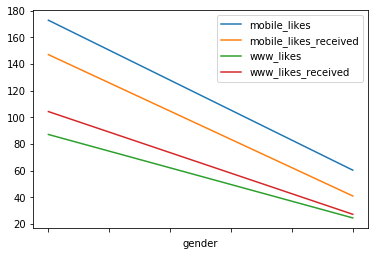

In [32]:
# Lets analyze mobile like & www likes with respect to Gender
facebook_data.pivot_table(values=['mobile_likes_received','mobile_likes',
                                  'www_likes_received','www_likes'],index="gender").plot()

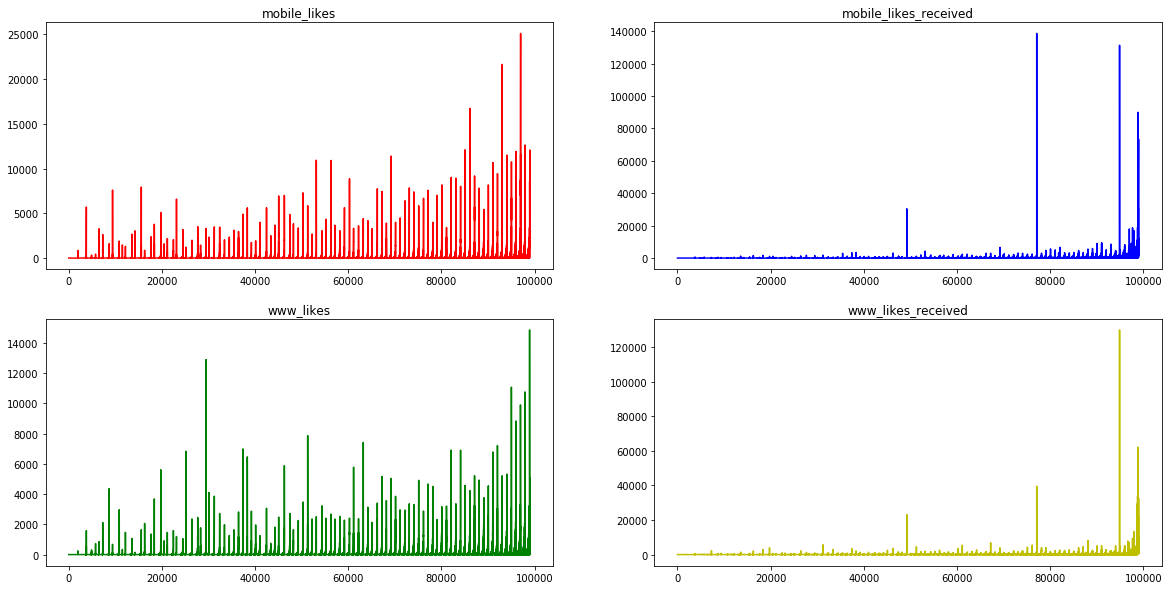

In [33]:
#graphical representation of mobile, www likes and Likes Received
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.subplot(2,2,1)
plt.title("mobile_likes")
plt.plot(facebook_data.mobile_likes,'r')
plt.subplot(2,2,2)
plt.title("mobile_likes_received")
plt.plot(facebook_data.mobile_likes_received,'b')
plt.subplot(2,2,3)
plt.title("www_likes")
plt.plot(facebook_data.www_likes,'g')
plt.subplot(2,2,4)
plt.title("www_likes_received")
plt.plot(facebook_data.www_likes_received,'y')
plt.show()

In [34]:
# Most Liked People
facebook_data.sort_values(by="likes_received",ascending=False)[:10]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group,year_group
94904,1674584,17,14,1996,8,female,401.0,818,395,1016,261197,659,131244,357,129953,11-20,1-2 years
77119,1441676,20,5,1993,8,female,253.0,230,73,2078,178166,1982,138561,96,39605,11-20,0-1 year
98820,1715925,23,4,1990,9,female,705.0,4077,793,1877,152014,80,89911,1797,62103,21-30,1-2 years
98992,2063006,20,4,1993,1,female,402.0,1988,332,7351,106025,7248,73333,103,32692,11-20,1-2 years
98876,1053087,23,6,1990,6,male,596.0,4320,836,2996,82623,179,43410,2817,39213,21-30,1-2 years
49229,1432020,20,12,1993,1,male,245.0,79,50,477,53534,78,30387,399,23147,11-20,0-1 year
98771,2042824,18,25,1995,1,male,51.0,4817,32,1346,52964,1342,18925,4,34039,11-20,0-1 year
98935,1559908,20,4,1993,12,female,1334.0,4622,1819,4280,45633,472,30754,3808,14879,11-20,3-4 years
98934,1781243,17,1,1996,5,female,976.0,3683,755,10478,42449,246,27353,10232,15096,11-20,2-3 years
98684,1015907,74,27,1939,11,male,832.0,4630,831,966,39536,941,10199,25,29337,71-80,2-3 years


In [35]:
# Total no of likes numerically gender wise
facebook_data.groupby("gender").www_likes.sum()
#female has more no of likes in comparison to male

gender
female    3507554
male      1438765
Name: www_likes, dtype: int64

In [36]:
facebook_data.groupby("gender").friendships_initiated.sum()

gender
female    4584801
male      6053223
Name: friendships_initiated, dtype: int64

In [38]:
# Which age group tend to send more friend request
friend_requests=facebook_data.groupby('age_group').friendships_initiated.sum().sort_values(ascending=False)
friend_requests

age_group
11-20      4262993
21-30      2863374
31-40       781016
101-110     670153
51-60       558400
41-50       530270
61-70       474079
91-100      220746
71-80       133725
81-90       105628
111-120      37640
Name: friendships_initiated, dtype: int64

Text(0,0.5,'Friendships Initiated')

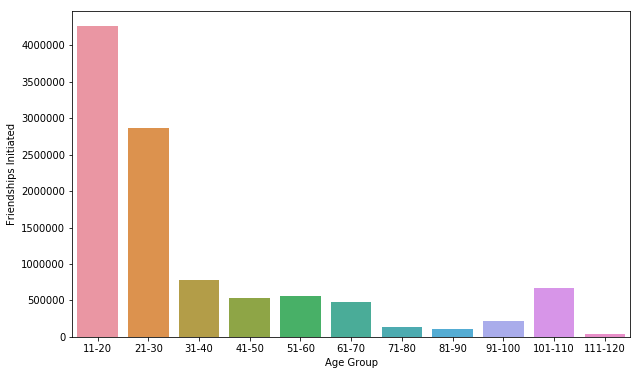

In [62]:
#Graphical Representation of Data
plt.figure(figsize=(10,6))
facebook_col1=facebook_data.groupby('age_group',as_index=False).agg({"friendships_initiated":"sum"})
sns.barplot(x=facebook_col1["age_group"],y=facebook_col1["friendships_initiated"])
plt.xlabel("Age Group")
plt.ylabel("Friendships Initiated")
# as per below graph , max friend requests were initiated by age group - 11-20

In [40]:
# Percentage of users using facebook on mobile
(facebook_data.mobile_likes>0).value_counts()

True     63946
False    35055
Name: mobile_likes, dtype: int64

In [42]:
percent=(facebook_data['mobile_likes']>0).sum()/(facebook_data['mobile_likes']).count()

In [43]:
percent
# As per below value, around 65% of people are using mobile devices to access facebook

0.6459126675488126